<a href="https://colab.research.google.com/github/kcaat/mlforhealthdata/blob/main/7_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BMI Dataset**

In [ ]:
### import data ###
from google.colab import files
import pandas as pd
import io

#upload dataset
uploaded = files.upload()

# Read the dataset into a Pandas DataFrame called dfBMI
dfBMI = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))

# Display the first few rows of the dataset to ensure it's loaded correctly
dfBMI.head()

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


### Exploratory data analysis

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

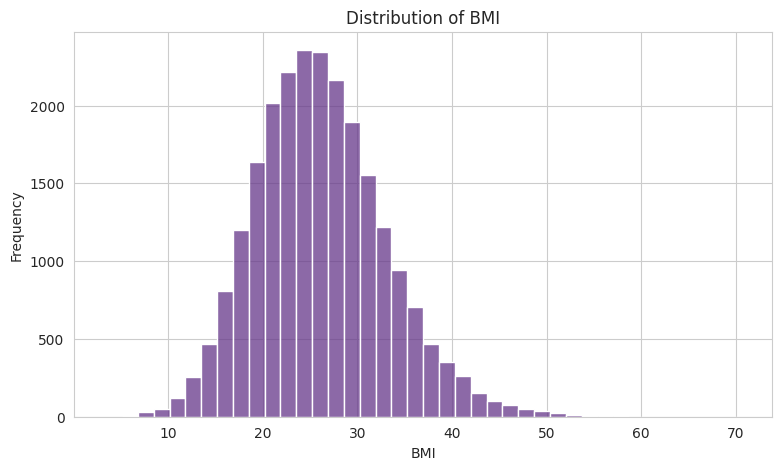

In [ ]:
# Summary Statistics
print(dfBMI.describe())

# Check for missing valies
print(dfBMI.isnull().sum())

# Data visualization with figures

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'BMI'
plt.figure(figsize=(9, 5))
sns.histplot(dfBMI['BMI'], bins=40, kde=False, color='#66378a')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Create an interactive histogram for 'BMI'
fig = px.histogram(dfBMI, x='BMI', nbins=40, title='Distribution of BMI', color_discrete_sequence=['#b59a36'])

# Customizing the layout and theme
fig.update_layout(template="simple_white")

# Show the plot
fig.show(renderer='colab')

# Create Interactive Boxplot of BMI

fig_box = px.box(dfBMI, x='Gender', y='BMI', title='Box Plot of BMI by Gender', color='Gender', color_discrete_sequence=['#0d7b94', '#82153d'])

# Customizing the layout and theme
fig_box.update_layout(template="plotly_white")

# Show the plot
fig_box.show('colab')

### K-means (unsupervised)

In [ ]:
### pre-process data for K-Means (unsupervised) ###

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop observations with implausible BMIs i.e. <10 or >50

dfBMI.drop(dfBMI[(dfBMI['BMI'] <10) | (dfBMI['BMI'] >50)].index, inplace=True)

#check data again
dfBMI.head()
print(dfBMI.describe())

# Encode Gender to be numeric

le = LabelEncoder() #function that converts to numerical
dfBMI['Gender'] = le.fit_transform(dfBMI['Gender'])  # Male: 1, Female: 0

dfBMI.head() #check that the encoding worked

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685


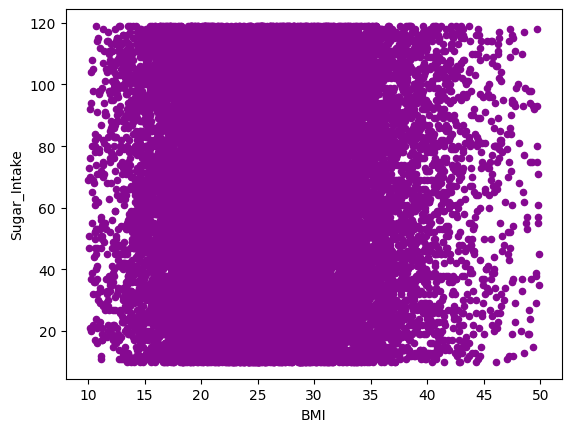

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

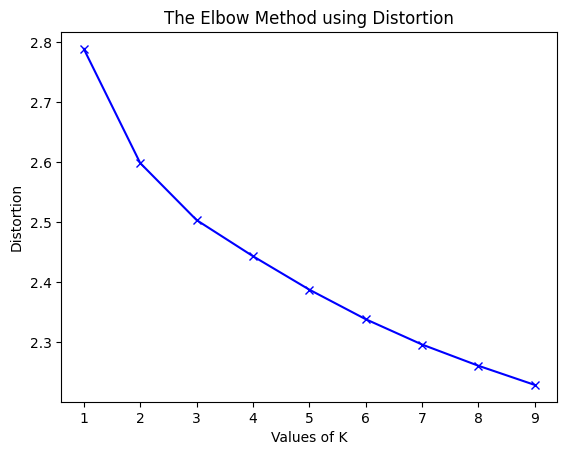

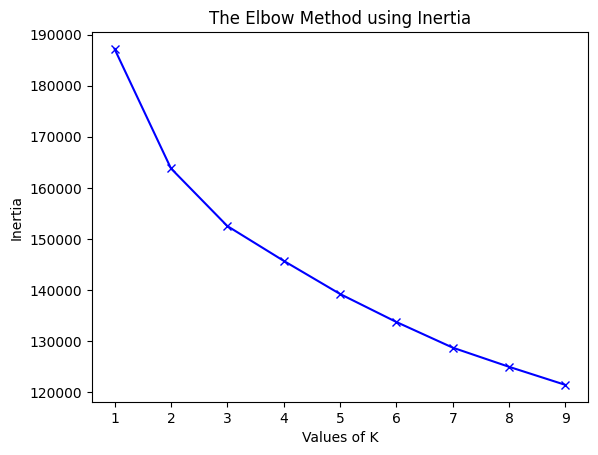

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


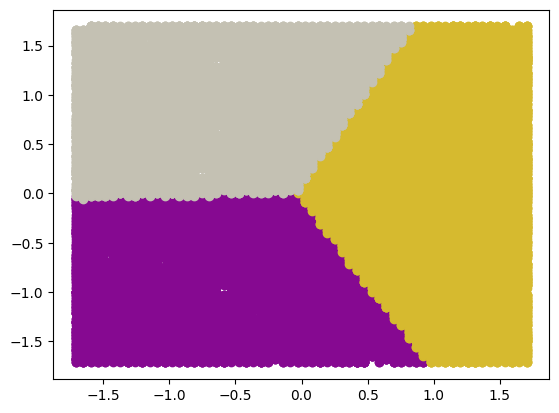

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,clusternum
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,1
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877,1
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,0
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,0
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,1


In [ ]:
### K-Means

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import io
from sklearn.cluster import KMeans

#initial data visualization
features = ['BMI', 'Sugar_Intake']
dfBMI[features].plot.scatter(x=features[0], y=features[1], color='#860991')
plt.show() #no pattern

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
features = ['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time','BMI']
dataBMI =  dfBMI[features].to_numpy()
dataBMI[0:10] #view

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
st_x = StandardScaler()
dataBMI = st_x.fit_transform(dataBMI)

dataBMI[0:10] #view first 10 lines to check  standardization

### elbow method to help choose number of clusters between 1 and 10
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

#X is data
X = dataBMI
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

#distortion

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#inertia

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#not clear, maybe K=3?

### apply K-Means

# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#c4c1b3']
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])
    # Display the plot
    plt.show()

# Choose features for clustering and visualization
#all features = ['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time','BMI']
#features = ['Age', 'Physical_Activity','Sugar_Intake', 'BMI'] #4 features starts to look muddy
features = ['Age','Sugar_Intake','BMI']
dataBMI =  dfBMI[features].to_numpy()
  #using features with count data (eg. 0/1 gender, 1-5 fast food freq) results in clusters being in single rows

#standardize chosen features
st_x = StandardScaler()
dataBMI = st_x.fit_transform(dataBMI)

# Apply k-means clustering on the standardized data
# Here, we're specifying 3 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=0) #similar to choosing a randomizer in R for reproducibility
label = kmeans.fit_predict(dataBMI)

# Visualize the clustering results using the defined function
plot_clusters(dataBMI, label, 3)
  #interpretation

### append cluster numbers to data

dfBMI["clusternum"]=label #assign new column called clusternum
dfBMI.head()

In [ ]:
### Look at characteristics of each cluster

print(dfBMI.groupby('clusternum')['clusternum'].count())
print(dfBMI.groupby('clusternum')['Gender'].sum()) #male=1, so number of males
print(dfBMI.groupby('clusternum')['Age','Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time','BMI'].mean())

#cluster 1 has higher mean age
#cluster 1<2<3 for sugar intake
#clusters are similar across other variables

clusternum
0    7455
1    8714
2    7233
Name: clusternum, dtype: int64
clusternum
0    2749
1    3198
2    2658
Name: Gender, dtype: int64
                  Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
clusternum                                                               
0           37.749832     2490.949430     34.933333          90.383233   
1           67.521574     2502.708400     65.837962          89.340716   
2           36.742984     2493.463431     94.416839          88.878335   

            Fast_Food_Frequency  Screen_Time        BMI  
clusternum                                               
0                      2.015158     5.516432  26.196217  
1                      2.003443     5.551182  26.095280  
2                      2.039956     5.378958  26.094001  


<ipython-input-69-8fc866c81bd3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(dfBMI.groupby('clusternum')['Age','Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time','BMI'].mean())


### K-NN (supervised)

In [ ]:
### pre-process data for K-NN (supervised) ###

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Create a new variable for the outcome, obesity #

def Obesity (BMI):
    if BMI<30:
        return 0
    if (BMI)>=30.0000:
       return 1
dfBMI['Obesity']=dfBMI['BMI'].apply(Obesity)
print(dfBMI.head()) #check new variable

dfBMI['Obesity'].value_counts() # Proportion of individuals with obesity - 26.5%

# Check for correlations among the features
dfBMI[['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']].corr()
# The features are weakly correlated

# Encode Gender to be numeric
le = LabelEncoder() #function that converts to numerical
dfBMI['Gender'] = le.fit_transform(dfBMI['Gender'])  # Male: 1, Female: 0

dfBMI.head() #check that the encoding worked

# Split data into features and label
X = dfBMI[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]
y = dfBMI['Obesity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  #test_size is proportion of data used as test set, 20% is standard

# Scale the data
scaler = StandardScaler() #scales to mean of 0, SD of 1
X_train = scaler.fit_transform(X_train) #calculates mean and SD, then scales
X_test = scaler.transform(X_test) #applies same scaling to test set


   Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0   56  Female            3091            90                160   
1   69  Female            2090           106                 27   
2   46    Male            2938            11                 45   
3   32  Female            3022            48                112   
4   60  Female            2350            83                115   

   Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  Obesity  
0                    4            1  1.569070  81.199394  32.981343        1  
1                    0            9  1.629449  74.273566  27.973877        0  
2                    2            3  1.637726  71.453466  26.640417        0  
3                    1            8  1.514198  98.163045  42.813720        1  
4                    0            7  1.410559  57.323914  28.810685        0  


In [ ]:
### K-NN Analysis

# First import the necessary functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Setting K to 5
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3035  428]
 [1097  147]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      3463
           1       0.26      0.12      0.16      1244

    accuracy                           0.68      4707
   macro avg       0.50      0.50      0.48      4707
weighted avg       0.61      0.68      0.63      4707



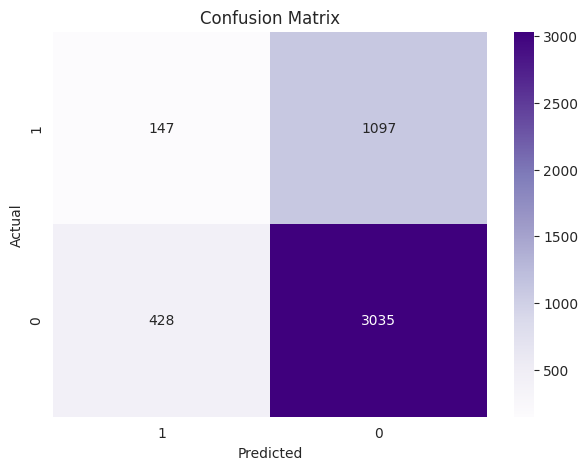

In [ ]:
## Visualization of KNN Results Using a Confusion Matrix Heatmap ##
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = dfBMI['Obesity'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Repeat KNN with K = 5 using Manhattan distance
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')  # because of outliers. # Worse performance; stick with Euclidean distance
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')  # Setting K to 3
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
## Visualization of KNN Results Using a Confusion Matrix Heatmap ##

# Get unique classes
classes = dfBMI['Obesity'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Repeat KNN using Hamming distance beacuse of the binary variables

knn = KNeighborsClassifier(n_neighbors=3, metric='hamming')  # Setting K to 3; worse performance. Stick to Euclidean distance
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')  # because of outliers
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Elbow method

In [ ]:
### elbow method

# Choose a range of k values to test. In this case, we'll test values from 1 to 49
k_values = range(1, 50)

# A list to keep track of the error rates for each k value.
errors = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

# Plot the visualization of the relationship between K and the error rates

plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

Re-run K-NN using K values based on Elbow

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=24, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=25, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=26, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=27, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=28, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=29, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with another K
knn = KNeighborsClassifier(n_neighbors=31, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Repeat K-NN Analysis by dropping one feature at a time

In [ ]:
### Drop sugar intake since it may be correlated with calorie intake (although it is not in this dataset###

# Split data into features and label
X = dfBMI[['Age', 'Gender', 'Calorie_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]
y = dfBMI['Obesity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  #test_size is proportion of data used as test set, 20% is standard

# Scale the data
scaler = StandardScaler() #scales to mean of 0, SD of 1
X_train = scaler.fit_transform(X_train) #calculates mean and SD, then scales
X_test = scaler.transform(X_test) #applies same scaling to test set

In [ ]:
# Repeat KNN starting with K = 5

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with K = 5 using Manhattan distance

knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan') # Worse performance; stick with Euclidean distance
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with K = 3

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with K = 1

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with K = 7

knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
### Additionally, drop screen time since it may be correlated with physcial actibvity ###

# Split data into features and label
X = dfBMI[['Age', 'Gender', 'Calorie_Intake', 'Physical_Activity', 'Fast_Food_Frequency']]
y = dfBMI['Obesity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  #test_size is proportion of data used as test set, 20% is standard

# Scale the data
scaler = StandardScaler() #scales to mean of 0, SD of 1
X_train = scaler.fit_transform(X_train) #calculates mean and SD, then scales
X_test = scaler.transform(X_test) #applies same scaling to test set

In [ ]:
# Repeat KNN with K = 5

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with K = 7

knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
### Drop calorie intake instead of sugar intake ###

# Split data into features and label
X = dfBMI[['Age', 'Gender', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]
y = dfBMI['Obesity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  #test_size is proportion of data used as test set, 20% is standard

# Scale the data
scaler = StandardScaler() #scales to mean of 0, SD of 1
X_train = scaler.fit_transform(X_train) #calculates mean and SD, then scales
X_test = scaler.transform(X_test) #applies same scaling to test set


In [ ]:
# Repeat KNN with K = 5

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with K = 7

knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Repeat KNN with K = 3

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train) # Use this function to train the model

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
## Visualization of KNN Results Using a Confusion Matrix Heatmap ##
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = dfBMI['Obesity'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Lung cancer dataset**

In [ ]:
### import data ###
from google.colab import files
import pandas as pd
import io

#upload dataset
uploaded = files.upload()

# Read the dataset into a Pandas DataFrame called dfBMI
dfLung = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon#1-Dataset2.csv']))

# Display the first few rows of the dataset to ensure it's loaded correctly
dfLung.head()

#note that all values are already numeric, so encoding is not needed

## Summary Statistics

print(dfLung.describe())

# Checking for missing values in the dataset

print(dfLung.isna().sum())
dfLung.dtypes

Saving CHL5230-F23-Datathon#1-Dataset2.csv to CHL5230-F23-Datathon#1-Dataset2.csv
               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker   Chest Pain  \
count   1465.000000  1465.000000  1465.000000     1465.000000  1465.000000   
mean       3.741297     3.844369     3.425256     

Age                  int64
Gender               int64
Air Pollution        int64
Alcohol Usage        int64
Genetic Risk         int64
Lung Disease         int64
Obesity              int64
Smoking              int64
Passive Smoker       int64
Chest Pain           int64
Coughing of Blood    int64
Severity             int64
dtype: object

Exploratory data analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for 'Severity' of Lung Cancer against other variables
sns.set_style('whitegrid')


plt.figure(figsize=(9, 5))
sns.histplot(dfLung['Age'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Age among Lung Cancer Patients')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.show()
#features = ['Severity', 'Age']
#dfLung[features].plot.scatter(x=features[0], y=features[1], color='#860991')
#plt.show()

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(dfLung['Air Pollution'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Air Pollution among Lung Cancer Patients')
plt.xlabel('Air Pollution')
plt.ylabel('Number of patients')
plt.show()

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(dfLung['Lung Disease'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Lung Disease among Lung Cancer Patients')
plt.xlabel('Lung Disease')
plt.ylabel('Number of patients')
plt.show()

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(dfLung['Obesity'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Obesity among Lung Cancer Patients')
plt.xlabel('Obesity')
plt.ylabel('Number of patients')
plt.show()

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(dfLung['Genetic Risk'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Genetic Risk among Lung Cancer Patients')
plt.xlabel('Genetic Risk')
plt.ylabel('Number of patients')
plt.show()

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(dfLung['Smoking'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Smoking among Lung Cancer Patients')
plt.xlabel('Smoking')
plt.ylabel('Number of patients')
plt.show()

In [ ]:
sns.heatmap(dfLung.corr())

From the above heatmap, we can actually see that there is very little currently, with the untransformed data that is correlated with severity. Looking at the original data, Severity is actually encorded 0 for healthy - Non cancer patients, and then 1, 2, 3 for cancer patients.

In [ ]:
### we can consider breaking down the patient population to cancer vs. no cancer to see if there is any changes to the above correlations prior to transforming the data.

#replace method
Severity = [0,1,2,3]
Cancer = [0, 1, 1, 1]

dfLung['Cancer'] = dfLung['Severity'].replace(Severity, Cancer)
dfLung.head()

sns.heatmap(dfLung.corr())

In [ ]:
### pre-process data for K-Means (unsupervised) ###

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Choose features for clustering and visualization
features = ['Air Pollution', 'Alcohol Usage', 'Genetic Risk', 'Lung Disease', 'Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood','Severity']
  #NOTE: this is all features, from the correlation map above, age/gender had little to do with severity and were removed.

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
dataLung =  dfLung[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
st_x = StandardScaler()
dataLung = st_x.fit_transform(dataLung)

dataLung[0:10] #view first 10 lines to check  standardization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

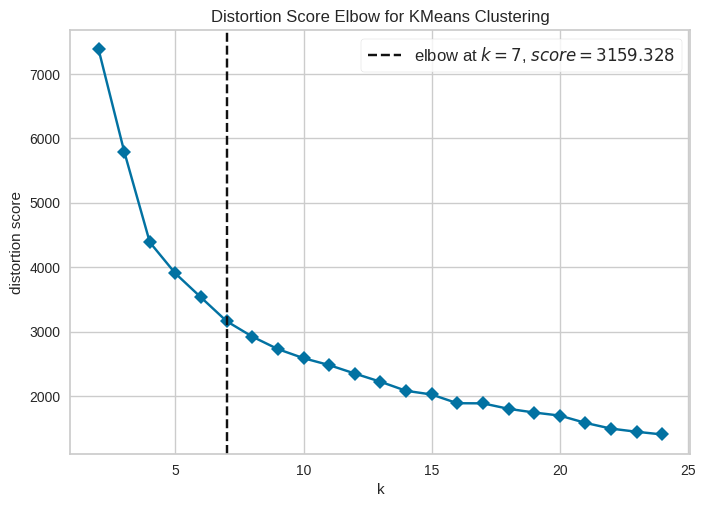

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=24, random_state=1), k=(2, 25),
                 timings=False)

In [ ]:
## APPLY THE ELBOW METHOD FOR KMEANS

from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=1),
                  dataLung2,
                  k=(2, 25),
                  timings=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



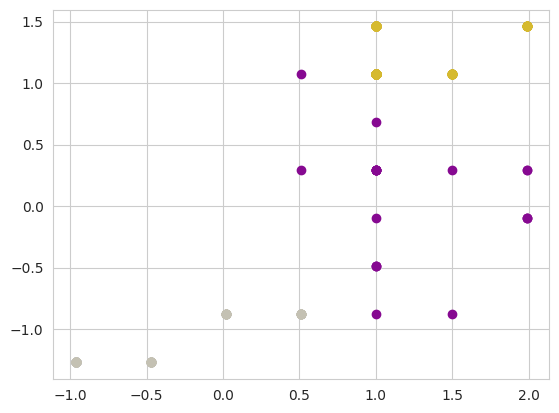

In [ ]:
# Required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#c4c1b3']
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])
    # Display the plot
    plt.show()

# Apply K-Means clustering on the standardized data


kmeans = KMeans(n_clusters=7, random_state=5) # Specify 7 clusters with a fixed random state for reproducibility
label = kmeans.fit_predict(dataLung)

# Visualize the clustering results using the defined function
plot_clusters(dataLung, label, 3)

In [ ]:
#Another way to try to re-cluster is selecting fewer features - selecting at least 0.3 and above from correlation heat map.
features2 = ['Genetic Risk', 'Air Pollution', 'Alcohol Usage', 'Obesity']
# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
dataLung2 =  dfLung[features].to_numpy()

# Standardize the data - this makes the mean 0 and standard deviation 1 for each feature
st_x = StandardScaler()
dataLung2 = st_x.fit_transform(dataLung)

dataLung2[0:10] #view first 10 lines to check  standardization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



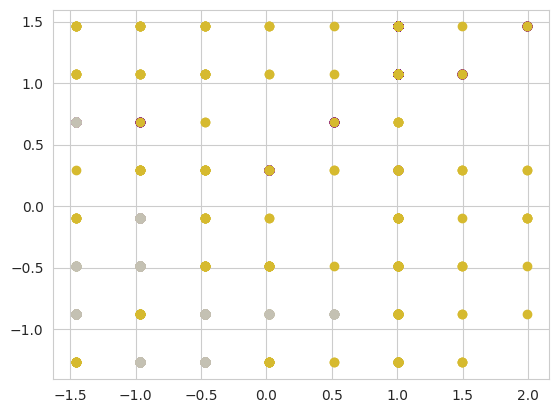

In [ ]:
# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#c4c1b3']
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])
    # Display the plot
    plt.show()

# Apply K-Means clustering on the standardized data

kmeans = KMeans(n_clusters=3, random_state=5) # Specify 3 clusters with a fixed random state for reproducibility
label = kmeans.fit_predict(dataLung2)

# Visualize the clustering results using the defined function
plot_clusters(dataLung2, label, 3)

There does not appear to be a meaningful cluster from this data on lung cancer patients. We will transition to Supervised learning. However, from our early data analysis, we may see that there may be a signal between cancer patients and non-cancer patients.

In [ ]:
## IMPLENTATION OF K-NN with Scikit-LEARN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Preprocessing the Data

#Splitting the data into features and labels
X = dfLung[['Genetic Risk', 'Air Pollution', 'Alcohol Usage', 'Obesity']]
Y = dfLung['Cancer']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Then, scale the features since KNN is sensitive to magnitude.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Apply KNN
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')  # Setting K to 3 as an example
knn.fit(X_train, Y_train)

# Predict using the test data
Y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = dfLung['Cancer'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#REPEAT BUT WITH K = 5

#Preprocessing the Data

#Splitting the data into features and labels
X = dfLung[['Genetic Risk', 'Air Pollution', 'Alcohol Usage', 'Obesity']]
Y = dfLung['Cancer']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Then, scale the features since KNN is sensitive to magnitude.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Apply KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Setting K to 5 as an example
knn.fit(X_train, Y_train)

# Predict using the test data
Y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = dfLung['Cancer'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# REPEAT BUT WITH K = 7

#Preprocessing the Data

#Splitting the data into features and labels
X = dfLung[['Genetic Risk', 'Air Pollution', 'Alcohol Usage', 'Obesity']]
Y = dfLung['Cancer']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Then, scale the features since KNN is sensitive to magnitude.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Apply KNN
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')  # Setting K to 7 as an example
knn.fit(X_train, Y_train)

# Predict using the test data
Y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

# Get unique classes
classes = dfLung['Cancer'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Repeat but with Manhattan distance, Hamming Distance
#Preprocessing the Data

#Splitting the data into features and labels
X = dfLung[['Genetic Risk', 'Air Pollution', 'Alcohol Usage', 'Obesity']]
Y = dfLung['Cancer']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Then, scale the features since KNN is sensitive to magnitude.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Apply KNN
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')  # Setting K to 3 as an example
knn.fit(X_train, Y_train)

# Predict using the test data
Y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

# Get unique classes
classes = dfLung['Cancer'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()